In [1]:
from asim.training.models.sim_agent.smart.smart import SMART
from asim.training.models.sim_agent.smart.smart_config import SMARTConfig

In [2]:
config = SMARTConfig()
smart_model = SMART(config)

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Map: nuplan_us-nv-las-vegas-strip'}>)

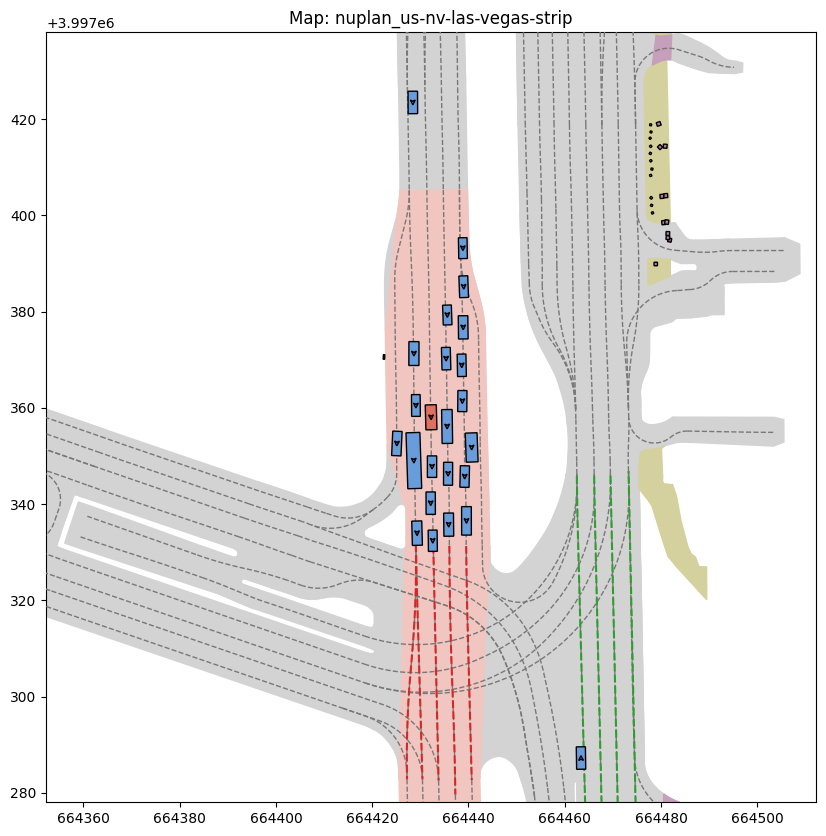

In [3]:
from pathlib import Path
from asim.dataset.scene.arrow_scene import ArrowScene
from asim.common.visualization.matplotlib.plots import plot_scene_at_iteration

from asim.dataset.scene.scene_builder import ArrowSceneBuilder
from asim.dataset.scene.scene_filter import SceneFilter

from nuplan.planning.utils.multithreading.worker_sequential import Sequential


log_names = None
split = "nuplan_mini_val"
scene_filter = SceneFilter(
    split_names=[split], log_names=log_names, timestamp_threshold_s=8.0, duration_s=8.0, history_s=1.0
)
scene_builder = ArrowSceneBuilder("/home/daniel/asim_workspace/data")
worker = Sequential()
# worker = RayDistributed()
scenes = scene_builder.get_scenes(scene_filter, worker)
scene = scenes[23]
plot_scene_at_iteration(scene, iteration=0)

In [9]:
from asim.training.feature_builder.smart_feature_builder import SMARTFeatureBuilder

feature_builder=  SMARTFeatureBuilder()

feature_dict = feature_builder.build_features(scene)
feature_dict["pt_token"].keys()

dict_keys(['type', 'pl_type', 'light_type', 'num_nodes'])

(1675, 3, 2)


Text(0.5, 1.0, 'map_save/traj_pos')

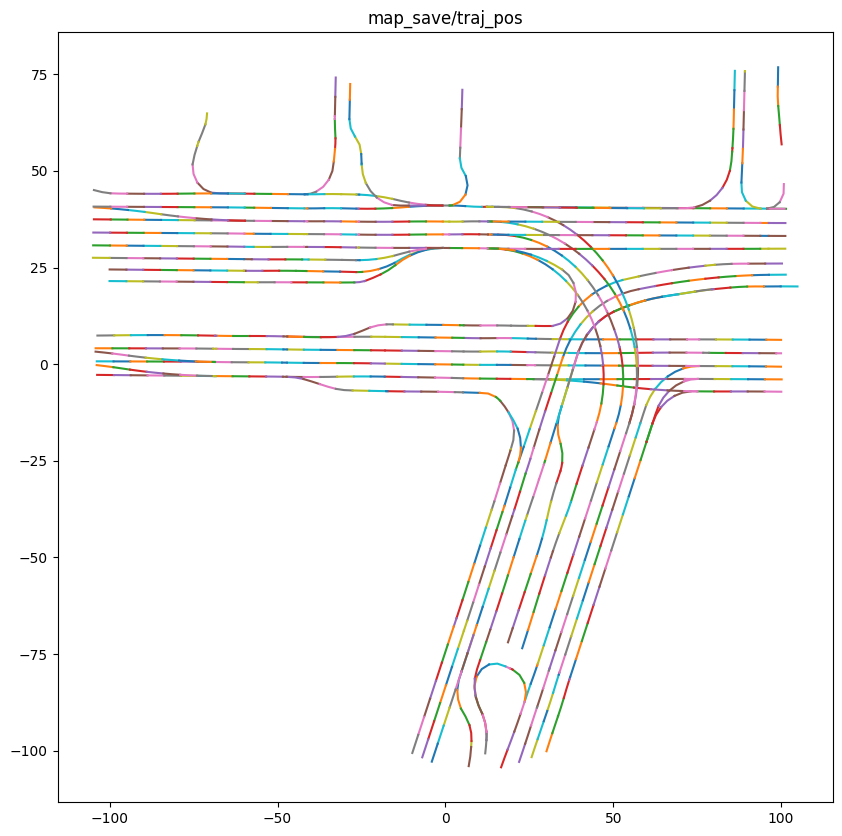

In [10]:
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(10, 10))

traj_pos = feature_dict["map_save"]["traj_pos"]
pl_type = feature_dict["pt_token"]["pl_type"]
print(traj_pos.shape)
for i in range(
    traj_pos.shape[0],
):
    if pl_type[i] == 1:
        ax.plot(traj_pos[i, :, 0], traj_pos[i, :, 1])

ax.set_title("map_save/traj_pos")

NameError: name 'map_segments' is not defined

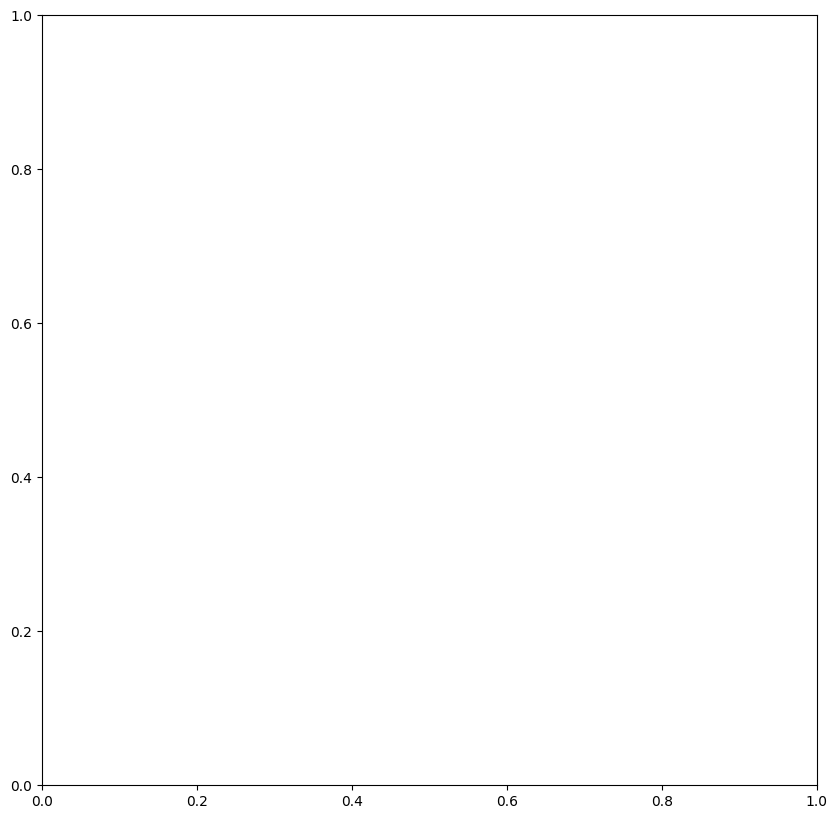

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

# for boundary in boundaries:
#     ax.plot(boundary[:, 0], boundary[:, 1], color="blue", linewidth=1.0, alpha=1.0)
for map_segment in map_segments:
    ax.plot(map_segment[:, 0], map_segment[:, 1], linewidth=1.0, alpha=1.0)
